In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_post_feature_selection (1).csv')
df.shape

(3554, 13)

In [ ]:
!pip install catboost

In [ ]:
df.columns


Index(['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'built_up_area', 'servant room', 'store room',
       'furnishing_type', 'luxury_category', 'floor_category', 'price'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

# Load the dataset
df = pd.read_csv('gurgaon_properties_missing_value_imputation (1).csv')

# Check if the required columns are in the DataFrame
print(df.columns)

# Assuming 'price' is the target column in the dataframe
# Prepare the features and target variable
columns = ['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony', 'agePossession',
           'built_up_area', 'servant room', 'store room', 'furnishing_type', 'luxury_category', 'floor_category']

# Assuming the feature columns are pre-processed, convert them to the appropriate format
# For example, converting categorical variables to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df[columns])

# Ensure 'price' column is present in the dataset
y_train = np.log1p(df['price'])  # Apply log transformation to the target

X_train = df_encoded  # Feature matrix

# Train the CatBoost model
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=[0, 1, 3, 4, 5, 7, 8, 9, 10, 11])
model.fit(X_train, y_train)

# Make a prediction on a sample row (use any row or an example for testing)
sample_data = {
    'property_type': ['flat'],
    'sector': ['Sector 37'],
    'bedRoom': [2],
    'bathroom': [2],
    'balcony': [1],
    'agePossession': [5],
    'built_up_area': [1200],
    'servant room': [0],
    'store room': [1],
    'furnishing_type': ['Semi-Furnished'],
    'luxury_category': ['Medium'],
    'floor_category': ['Low']
}

sample_df = pd.DataFrame(sample_data)

# Convert sample data to the same format as training data (e.g., one-hot encoding)
sample_df_encoded = pd.get_dummies(sample_df)

# Align the sample data with the columns of the training data (ensure all feature columns match)
sample_df_encoded = sample_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make a prediction for the sample data
log_pred = model.predict(sample_df_encoded)[0]

# Calculate residuals from training data for statistical confidence interval
log_preds_train = model.predict(X_train)
residuals = y_train - log_preds_train

# Calculate the standard deviation of the residuals
residual_std = residuals.std()

# Confidence Interval Calculation (97% confidence)
z_score = 2.17  # For 97% confidence interval
log_low = log_pred - z_score * residual_std
log_high = log_pred + z_score * residual_std

# Convert log prices back to normal scale
base_price = np.expm1(log_pred)
low_price = np.expm1(log_low)
high_price = np.expm1(log_high)

# Display the results
print(f"💰 **Estimated Price:** ₹ {round(base_price, 2)} Cr")
print(f"📊 **97% Confidence Interval:** ₹ {round(low_price, 2)} Cr — ₹ {round(high_price, 2)} Cr")


Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')


KeyError: "['luxury_category', 'floor_category'] not in index"

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

# Load the dataset (Keep the initial load from /content/gurgaon_properties_post_feature_selection (1).csv)
# df = pd.read_csv('gurgaon_properties_missing_value_imputation (1).csv') # Remove or comment out this line

# Check if the required columns are in the DataFrame
print(df.columns)

# Assuming 'price' is the target column in the dataframe
# Prepare the features and target variable
columns = ['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony', 'agePossession',
           'built_up_area', 'servant room', 'store room', 'furnishing_type']

# Assuming the feature columns are pre-processed, convert them to the appropriate format
# For example, converting categorical variables to dummy variables (one-hot encoding)
# This line will now work as df is the dataframe loaded earlier which includes the columns
df_encoded = pd.get_dummies(df[columns]) # This line was missing or commented out

# Ensure 'price' column is present in the dataset
y_train = np.log1p(df['price'])  # Apply log transformation to the target

X_train = df_encoded  # Feature matrix - Ensure this line is present and not commented out

# Train the CatBoost model
# Make sure the cat_features indices are correct after one-hot encoding if necessary.
# With get_dummies, the categorical features will be at the beginning of the encoded dataframe.
# You might need to adjust the indices in cat_features based on the order after get_dummies.
# Alternatively, you can let CatBoost handle categorical features directly by passing the column names
# or using the 'cat_features' parameter with column names if the input is a pandas DataFrame.
# However, since you are using get_dummies, the features are already numerical or boolean.
# Remove or update the cat_features parameter based on the structure of df_encoded.
# Given df_encoded is the result of get_dummies, all columns should be numeric or boolean.
# The cat_features parameter is typically used for specifying original categorical columns in the input DataFrame.
# Since you've already one-hot encoded, you likely don't need to specify cat_features.
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6) # Removed cat_features

model.fit(X_train, y_train)

# Make a prediction on a sample row (use any row or an example for testing)
sample_data = {
    'property_type': ['flat'],
    'sector': ['Sector 37'],
    'bedRoom': [2],
    'bathroom': [2],
    'balcony': [1],
    'agePossession': [5],
    'built_up_area': [1200],
    'servant room': [0],
    'store room': [1],
    'furnishing_type': ['Semi-Furnished'],
    'luxury_category': ['Medium'],
    'floor_category': ['Low']
}

sample_df = pd.DataFrame(sample_data)

# Convert sample data to the same format as training data (e.g., one-hot encoding)
sample_df_encoded = pd.get_dummies(sample_df)

# Align the sample data with the columns of the training data (ensure all feature columns match)
sample_df_encoded = sample_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make a prediction for the sample data
log_pred = model.predict(sample_df_encoded)[0]

# Calculate residuals from training data for statistical confidence interval
log_preds_train = model.predict(X_train)
residuals = y_train - log_preds_train

# Calculate the standard deviation of the residuals
residual_std = residuals.std()

# Confidence Interval Calculation (97% confidence)
z_score = 2.17  # For 97% confidence interval
log_low = log_pred - z_score * residual_std
log_high = log_pred + z_score * residual_std

# Convert log prices back to normal scale
base_price = np.expm1(log_pred)
low_price = np.expm1(log_low)
high_price = np.expm1(log_high)

# Display the results
print(f"💰 **Estimated Price:** ₹ {round(base_price, 2)} Cr")
print(f"📊 **97% Confidence Interval:** ₹ {round(low_price, 2)} Cr — ₹ {round(high_price, 2)} Cr")

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')
0:	learn: 0.5187832	total: 48.3ms	remaining: 24.1s
1:	learn: 0.4839186	total: 49.8ms	remaining: 12.4s
2:	learn: 0.4544443	total: 51.1ms	remaining: 8.47s
3:	learn: 0.4285860	total: 52.6ms	remaining: 6.52s
4:	learn: 0.4043594	total: 53.9ms	remaining: 5.33s
5:	learn: 0.3847656	total: 55.1ms	remaining: 4.54s
6:	learn: 0.3657809	total: 56.4ms	remaining: 3.97s
7:	learn: 0.3497377	total: 57.6ms	remaining: 3.54s
8:	learn: 0.3345809	total: 58.9ms	remaining: 3.21s
9:	learn: 0.3222412	total: 60.3ms	remaining: 2.95s
10:	learn: 0.3118236	total: 61.6ms	remaining: 2.74s
11:	learn: 0.3019440	total: 62.9ms	remaining: 2.56s
12:	learn: 0.2939419	total: 64.2ms	remaining: 2.4s
13:	learn: 0.2875924	total: 65.2ms	r

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [ ]:
# prompt: Using dataframe df: find the mean  price of flats of sector 10

# Filter for flats in sector 10
sector_10_flats = df[(df['property_type'] == 'flat') & (df['sector'] == 'sector 10')]
# Calculate the mean price of the filtered data
mean_price_sector_10_flats = sector_10_flats['price'].mean()
# Print the result
mean_price_sector_10_flats

np.float64(1.275)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [ ]:
latlong = pd.read_csv('latlong.csv')

In [ ]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [ ]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [ ]:
new_df = df.merge(latlong, on='sector')
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Select only numeric columns before applying .mean()
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()


In [ ]:

group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [ ]:
fig=px.scatter_mapbox(group_df,lat='latitude',lon='longitude',color='price_per_sqft',size='built_up_area',color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [ ]:
new_df.to_csv('data_viz1.csv',index=False)

In [ ]:


from google.colab import files
files.download('data_viz1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [ ]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",We need to shift somewhere else,NaN,"['Lift(s)', 'Park']",NaN
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",Smartworld gem4 th floor new construction,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",Near to dwarka expressway\nNear to airport,[],"['Intercom Facility', 'Lift(s)', 'Park']","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,2 BHK Flat in Sohna,flat,breez global hill view,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,"1701 & 1708, Sohna, Gurgaon, Haryana",17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",Both adjacent properties available which can b...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
4,3 BHK Flat in Sector 92 Gurgaon,flat,bestech park view sanskruti,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others","Sector 92 Gurgaon, Gurgaon, Haryana",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...",Check out this 3 bhk apartment for sale in bes...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [ ]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [ ]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [ ]:
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [ ]:
from wordcloud import WordCloud

In [ ]:
feature_text = ' '.join(main)

In [ ]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [ ]:


from google.colab import files
files.download('feature_text.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

In [ ]:
from wordcloud import WordCloud
import plotly.graph_objects as go
import numpy as np



# Generate word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feature_text)

# Get word positions, frequencies, and sizes
word_freq = wordcloud.words_
positions = wordcloud.layout_

# Extract word data for plotting
words = []
freqs = []
font_sizes = []
x_coords = []
y_coords = []

for (word, freq), font_size, position, orientation, color in positions:
    x, y = position
    words.append(word)
    freqs.append(freq)
    font_sizes.append(font_size)
    x_coords.append(x)
    y_coords.append(-y)  # invert y-axis for better alignment

# Create Plotly scatter text plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_coords,
    y=y_coords,
    text=words,
    mode='text',
    textfont=dict(size=font_sizes, color='black'),
    hovertext=[f"{w}: {int(freq * 100)}%" for w, freq in zip(words, freqs)],
    hoverinfo='text'
))

# Adjust layout
fig.update_layout(
    title='Interactive Word Cloud',
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=40, l=0, r=0, b=0)
)

fig.show()


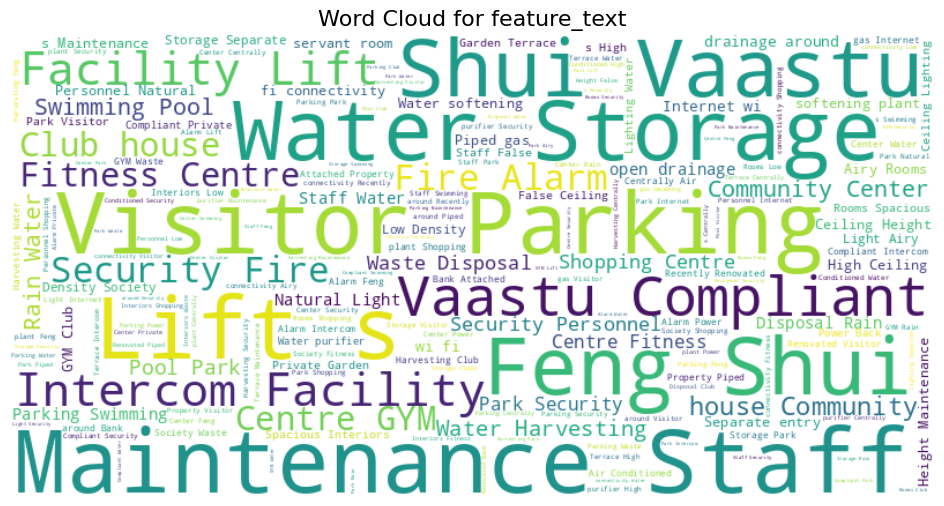

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt




# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(feature_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for feature_text', fontsize=16)
plt.show()


In [ ]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [ ]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [ ]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [ ]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()